In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [2]:
fig_scale = 0.7
FIGSIZE = (14*fig_scale, 8*fig_scale)

In [3]:
with open('..//data//women_hours_empirical', 'rb') as f:
    women_hours = pickle.load(f)

In [4]:
df_action = pd.read_pickle('..//data//dqi_actions_model1_opt_beta_simulations.pkl')
df_states = pd.read_pickle('..//data//dqi_states_model1_opt_beta_simulations.pkl')

df = pd.read_pickle('..//data//dqi_model1_opt_beta_simulations.pkl')

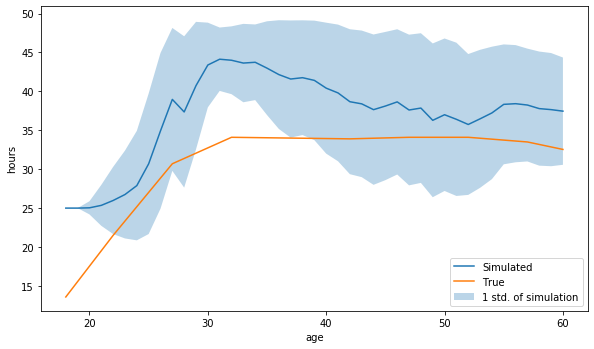

In [5]:
mean = np.array(df_action.drop('episode',axis=1).loc[df_action['actions'] > 0].groupby('Q').mean())
std = np.array(df_action.drop('episode',axis=1).loc[df_action['actions'] > 0].groupby('Q').std())

upper_bound = mean + std
lower_bound = mean - std

f, ax = plt.subplots(1, 1, figsize=FIGSIZE)
ax.plot(range(18,61), mean, label='Simulated')
ax.plot(range(18,61), women_hours[18:61], label='True')

ax.fill_between(range(18,61), upper_bound.reshape(-1), lower_bound.reshape(-1), alpha=0.3, label='1 std. of simulation')
ax.set_xlabel('age')
ax.set_ylabel('hours')
ax.legend(loc='lower right')

f.savefig("..//figures//dqi_model1_estimation_labour_supply.png")

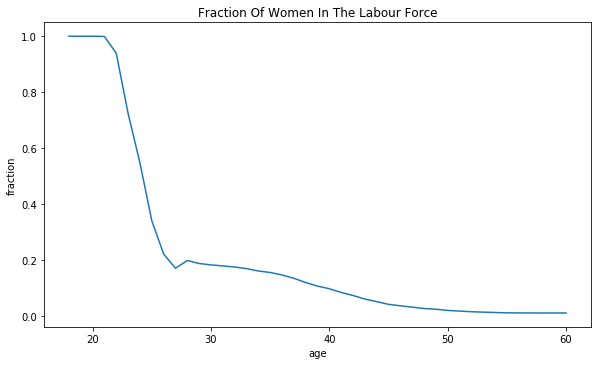

In [6]:
f, ax = plt.subplots(1,1, figsize=FIGSIZE)
women_frac = df_action.drop('episode',axis=1).loc[df_action['actions'] > 0].groupby('Q').count() / 5000
ax.plot(women_frac)
ax.set_title("Fraction Of Women In The Labour Force")
ax.set_ylabel('fraction')
ax.set_xlabel('age')
f.savefig('..//figures//dqi_model1_women_in_labour_force_fraction.png')

In [7]:
on_child_households = df_states.groupby('episode').max().loc[df_states.groupby('episode').max()['K'] == 1].index
res = list(on_child_households)

In [8]:
def find_first_child(q, k, k_next):
    if k == 0.0 and k_next == 1.0 and q > 23 and q < 50:
        return 1
    else:
        return 0
    

In [9]:


df_single_child = df_states.loc[df_states['episode'].isin(res)]

In [10]:
df_single_child['K_next'] = df_single_child['K'].shift(-1)


/Users/jeppejohansen/.local/share/virtualenvs/speciale-wQK9LG7Y/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
df_single_child['birth'] = df_single_child.apply(lambda row: find_first_child(row['Q'], row['K'], row['K_next']), axis=1)

/Users/jeppejohansen/.local/share/virtualenvs/speciale-wQK9LG7Y/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
def get_start_and_finish(e, q, birth):
    if birth == 1:
        start = q - 4
        finish = q + 10
        
        return (e, q, start, finish)
    return None

tmp = df_single_child.apply(lambda row: get_start_and_finish(row['episode'], row['Q'], row['birth']), axis=1)

In [13]:
timeline_offsets = [obs for obs in tmp if obs is not None]
timeline_offsets


[(3.0, 34.0, 30.0, 44.0),
 (7.0, 38.0, 34.0, 48.0),
 (13.0, 30.0, 26.0, 40.0),
 (15.0, 29.0, 25.0, 39.0),
 (18.0, 35.0, 31.0, 45.0),
 (20.0, 35.0, 31.0, 45.0),
 (24.0, 31.0, 27.0, 41.0),
 (27.0, 31.0, 27.0, 41.0),
 (28.0, 32.0, 28.0, 42.0),
 (29.0, 31.0, 27.0, 41.0),
 (31.0, 31.0, 27.0, 41.0),
 (34.0, 24.0, 20.0, 34.0),
 (39.0, 34.0, 30.0, 44.0),
 (44.0, 30.0, 26.0, 40.0),
 (45.0, 31.0, 27.0, 41.0),
 (48.0, 33.0, 29.0, 43.0),
 (51.0, 30.0, 26.0, 40.0),
 (53.0, 32.0, 28.0, 42.0),
 (56.0, 29.0, 25.0, 39.0),
 (58.0, 38.0, 34.0, 48.0),
 (64.0, 26.0, 22.0, 36.0),
 (65.0, 36.0, 32.0, 46.0),
 (68.0, 36.0, 32.0, 46.0),
 (71.0, 29.0, 25.0, 39.0),
 (74.0, 32.0, 28.0, 42.0),
 (75.0, 35.0, 31.0, 45.0),
 (85.0, 32.0, 28.0, 42.0),
 (90.0, 27.0, 23.0, 37.0),
 (93.0, 27.0, 23.0, 37.0),
 (95.0, 31.0, 27.0, 41.0),
 (98.0, 34.0, 30.0, 44.0),
 (100.0, 39.0, 35.0, 49.0),
 (104.0, 30.0, 26.0, 40.0),
 (105.0, 35.0, 31.0, 45.0),
 (110.0, 26.0, 22.0, 36.0),
 (111.0, 34.0, 30.0, 44.0),
 (123.0, 38.0, 34.0, 48.0

In [14]:
def offset_marker(e, q, timeline_offsets):
    for row in timeline_offsets:
        if row[0] == e:
            if row[2] <= q <= row[3]:
                return q - row[1]
    return None
    

In [ ]:
df_single_child['first_child_offset'] = df_single_child.apply(lambda x: offset_marker( \
                                                              x['episode'], x['Q'], \
                                                              timeline_offsets), axis=1)

In [ ]:
df_single_child_plot = df_single_child.loc[df_single_child['first_child_offset'].notnull()]

In [ ]:
rel_episodes = list(set(df_single_child_plot.episode))

In [ ]:
f, ax = plt.subplots(1,1, figsize=FIGSIZE)
single_child_plot = df_single_child_plot.groupby('first_child_offset').mean()['action']
ax.plot(single_child_plot, label='single-child mothers')
ax.axvline(0, c='red', ls='--', label='birth')
ax.set_xlabel('years from birth')
ax.set_ylabel('hours')
ax.set_title('Average Number Of Hours Of Single-child Women In Relations To Birth')
f.savefig('..//figures//women_supplied_hours_dqi_model1_birth_onset.png')

In [ ]:
plt.plot(df_single_child.groupby('Q').sum()['birth'])

# Women at thirty before and after child

In [ ]:
episodes_30_first_child = list(set(df_single_child.loc[(df_single_child['birth'] == 1) & \
                                                       (df_single_child['Q'] == 30.0)]['episode']))

In [ ]:
len(episodes_30_first_child)

In [ ]:
zero_child_households = df_states.groupby('episode').max().loc[df_states.groupby('episode').max()['K'] == 0].index
zero_res = list(zero_child_households)

In [ ]:
f, ax = plt.subplots(1,1, figsize=FIGSIZE)
ax.plot(df_states.loc[df_states['episode'].isin(zero_res)].groupby('Q').mean()['action'], label='no children')
ax.plot(df_single_child.groupby('Q').mean()['action'], label='1 child')
ax.axvline(30, ls='--', label='child birth', color='black')
ax.set_title("Single Child Vs. No Children Women")
ax.legend()
f.savefig('..//figures//dqi_single_child_vs_no_child_model1.png')